In [85]:
!pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [86]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [87]:
data = pd.read_csv('/content/Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [88]:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [89]:
X = data.iloc[:,3:13]
y = data.iloc[:,13]

In [90]:
# catogorical value
geography = pd.get_dummies(X['Geography'], drop_first=True)
gender = pd.get_dummies(X['Gender'], drop_first=True)

X = pd.concat([X,geography,gender],axis=1)
X.drop(['Geography', 'Gender'],axis=1, inplace=True)

In [91]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [92]:
from sklearn.model_selection import train_test_split

In [93]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [94]:
x_train.shape,x_test.shape

((8000, 11), (2000, 11))

In [95]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [96]:
# create Artificail Neural Network
from tensorflow.keras.models import Sequential # for create a block 
from tensorflow.keras.layers import Dense, ReLU,PReLU, Dropout # Dense for create hidden neuron, Dropout for overfitting problem

In [97]:
# Initialize ANN 
classifier = Sequential()

In [98]:
classifier.add(Dense(units=11,activation='relu')) # input layer
classifier.add(Dense(units=10,activation='relu')) # 1st hidden layer
classifier.add(Dropout(0.2))
classifier.add(Dense(units=7,activation='relu')) # 2nd hidden layer
classifier.add(Dropout(0.2))
classifier.add(Dense(units=1,activation='sigmoid')) # output layer

In [99]:
# add optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

In [100]:
# compile to model
classifier.compile(optimizer=optimizer, loss='binary_crossentropy',metrics=['accuracy'])

In [101]:
# early stopping
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20, 
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [102]:
model_history = classifier.fit(x_train,y_train,validation_split=0.33,batch_size = 10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 3s 4ms/step - loss: 0.4857 - accuracy: 0.7979 - val_loss: 0.4162 - val_accuracy: 0.8194
Epoch 2/1000
536/536 [==============================] - 2s 5ms/step - loss: 0.4165 - accuracy: 0.8287 - val_loss: 0.3585 - val_accuracy: 0.8531
Epoch 3/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3903 - accuracy: 0.8386 - val_loss: 0.3533 - val_accuracy: 0.8501
Epoch 4/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3825 - accuracy: 0.8427 - val_loss: 0.3441 - val_accuracy: 0.8565
Epoch 5/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3799 - accuracy: 0.8468 - val_loss: 0.3456 - val_accuracy: 0.8493
Epoch 6/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.3691 - accuracy: 0.8479 - val_loss: 0.3613 - val_accuracy: 0.8485
Epoch 7/1000
536/536 [==============================] - 4s 7ms/step - loss: 0.3718 - accuracy: 0.8511 - val_loss: 0.3556 - val_accuracy:

In [103]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

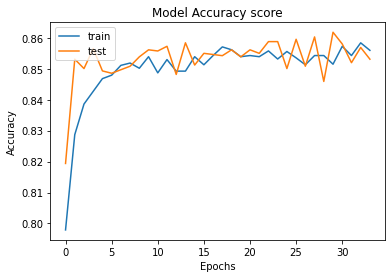

In [104]:
# plotting 
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy score')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','test'], loc='upper left')
plt.show()

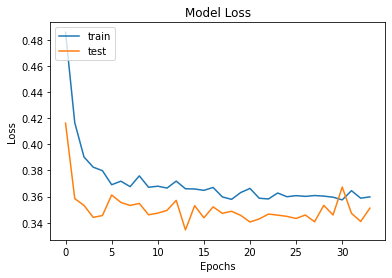

In [105]:
# plotting 
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [106]:
# test the model
y_pred = classifier.predict(x_test)
y_pred = (y_pred>=0.5)

63/63 [==============================] - 0s 2ms/step


In [107]:
from sklearn.metrics import confusion_matrix,accuracy_score

cm = confusion_matrix(y_test,y_pred)
cm

array([[1562,   23],
       [ 265,  150]])

In [108]:
score = accuracy_score(y_test,y_pred)
score

0.856

In [109]:
# get weights
classifier.get_weights()

[array([[-0.22622028,  0.23274897, -0.360645  ,  0.0716642 ,  0.5729055 ,
          0.25459364, -0.21776976, -0.29251274, -0.08419555,  0.07850261,
          0.08591379],
        [ 3.3916342 , -2.550561  ,  0.13572726,  2.467651  , -1.4326096 ,
          0.15854271, -2.4528084 ,  2.489303  ,  1.6489367 ,  0.3986092 ,
         -1.3143125 ],
        [ 0.11784237, -1.0276991 ,  0.18050916,  0.00858082, -0.04115883,
         -0.44411775,  0.5860765 ,  0.5578392 ,  0.6432543 , -0.105785  ,
         -0.279405  ],
        [ 0.58539796, -0.3680439 ,  0.36776796,  0.42236313, -1.3941303 ,
         -2.0278704 , -2.8020751 , -0.57303363, -0.46521473, -2.7695637 ,
         -0.33563712],
        [-0.26286978, -0.3858787 ,  3.1378014 , -1.1237925 , -0.1428588 ,
          0.91825783,  0.15740499, -0.85528004,  0.72508365, -3.4487338 ,
         -0.12151941],
        [-0.05734896,  1.4074755 , -0.15121703,  0.75219864, -0.57126796,
          1.3088282 , -0.34110487,  0.4656759 ,  0.6375497 ,  0.0450243